# **Linear Regression using Scikit_learn**

In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [3]:
from urllib.request import urlretrieve

urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7f84cd2f8d10>)

In [4]:
import pandas as pd
medical_df = pd.read_csv('medical.csv')
medical_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

##**Objective** **:**
To find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

In [5]:
# Let's check the data type for each column.
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Here are some statistics for the numerical columns
medical_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

## Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization.

In [7]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# The following settings will improve the default style and font sizes for our charts.
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive.

In [9]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [10]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   color_discrete_sequence=['orange'], 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

### Body Mass Index

Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.


In [11]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seem to form a [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) centered around the value 30, with a few outliers towards the right. Here's how BMI values can be interpreted ([source](https://study.com/academy/lesson/what-is-bmi-definition-formula-calculation.html)):

![](https://i.imgur.com/lh23OiY.jpg)

### Charges


In [12]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:

* For most customers, the annual medical charges are under \\$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
* There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is \\$7300, the median for smokers is close to \\$35,000.

###Smoker

In [13]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [14]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

It appears that 20% of customers have reported that they smoke. We can also see that smoking appears a more common habit among males.


###Age and Charges

In [15]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.
     

###BMI and Charges

In [16]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.


### Correlation

The values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.

In [17]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [18]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [19]:
# To compute the correlation for categorical columns, they must first be converted into numeric columns.
smoker_values = {'no':0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478




Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

The correlation coefficient has the following formula:

<img src="https://i.imgur.com/unapugP.png" width="360">


In [20]:
#Pandas dataframes also provide a .corr method to compute the correlation coefficients between all pairs of numeric columns
medical_df.corr()

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

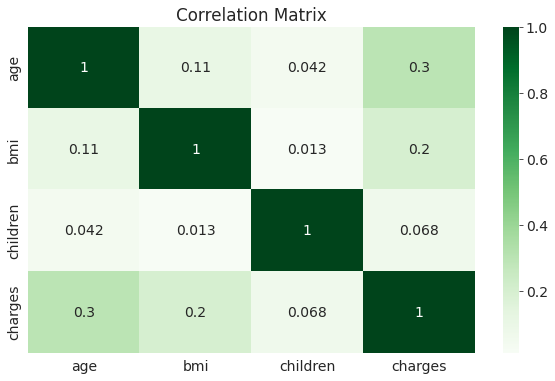

In [21]:
sns.heatmap(medical_df.corr(), cmap='Greens', annot=True)
plt.title('Correlation Matrix');

## Linear Regression using a Single Feature

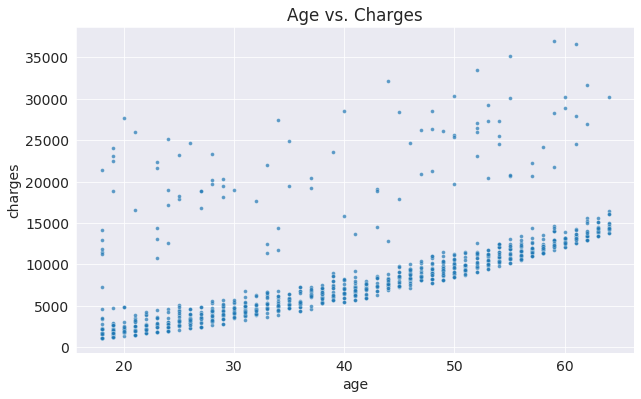

In [22]:
non_smoker_df = medical_df[medical_df.smoker == 'no']
plt.title('Age vs. Charges')
sns.scatterplot(data = non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

 ### Model

In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assume the following relationship between the two:

$charges = w \times age + b$

We'll try determine $w$ and $b$ for the line that best fits the data. 

* This technique is called _linear regression_, and we call the above equation a _linear regression model_, because it models the relationship between "age" and "charges" as a straight line. 

* The numbers $w$ and $b$ are called the _parameters_ or _weights_ of the model.

* The values in the "age" column of the dataset are called the _inputs_ to the model and the values in the charges column are called "targets". 

Let define a helper function `estimate_charges`, to compute $charges$, given $age$, $w$ and $b$.

In [23]:
def estimate_charges(age, w, b):
  return w*age+b

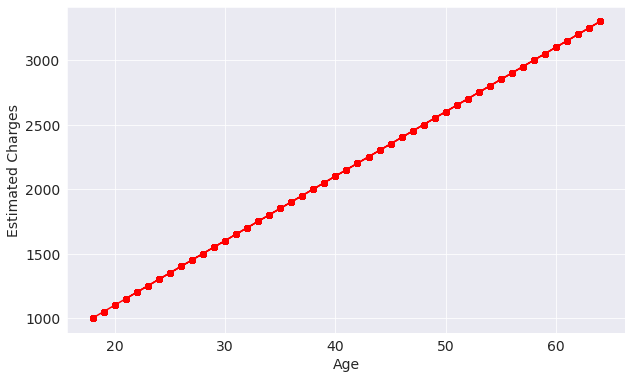

In [24]:
# Let's guess the values for w and b and use them to estimate the value for charges.
ages=non_smoker_df.age
w = 50
b = 100
estimated_charges = estimate_charges(ages, w, b)
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');


###We can overlay this line on the actual data, so see how well our model fits the data.



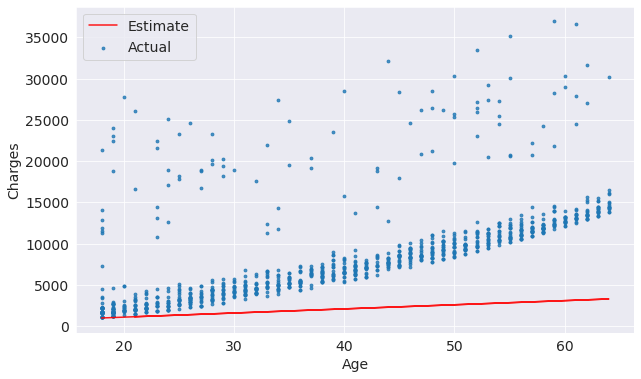

In [25]:
target=non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

Clearly, our estimates are quite poor and the line does not "fit" the data. However, we can try different values of $w$ and $b$ to move the line around. Let's define a helper function `try_parameters` which takes `w` and `b` as inputs and creates the above plot.

In [26]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target=non_smoker_df.charges

  estimated_charges = estimate_charges(ages, w, b)

  plt.plot(ages, estimated_charges, 'r', alpha=0.9 )
  plt.scatter(ages, target, s=8, alpha=0.8)
  plt.xlabel('Age');
  plt.ylabel('Charges')
  plt.legend(['Estimate', 'Actual']);


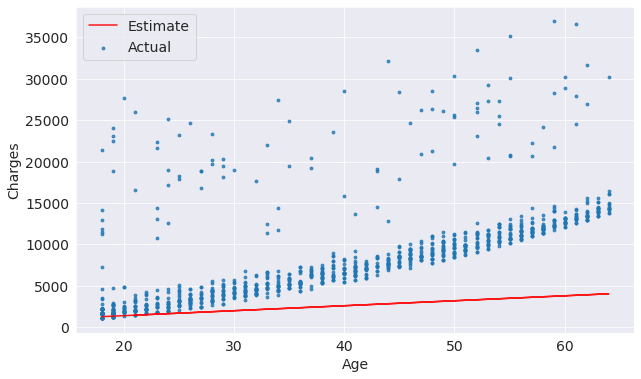

In [27]:
try_parameters(60, 200)

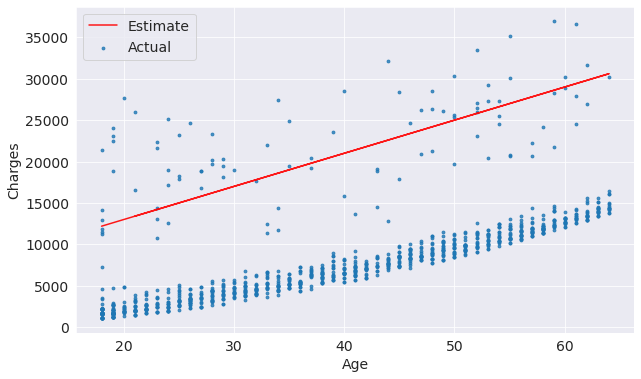

In [28]:
try_parameters(400, 5000)

### Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE). The above description can be stated mathematically as follows: 

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrically, the residuals can be visualized as follows:

<img src="https://i.imgur.com/ll3NL80.png" width="420">


In [29]:
import numpy as np

In [30]:
# define a function to compute the RMSE
def rmse(target, prediction):
  return np.sqrt(np.mean(np.square(target-prediction)))

In [31]:
# computing the RMSE for our model with a sample set of weights
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)
rmse(targets, predicted)

8461.949562575488

In [32]:
# modifying the try_parameters functions to also display the loss.
def try_parameters(w, b):
  ages=non_smoker_df.age
  target=non_smoker_df.charges
  predictions = estimate_charges(ages, w, b)

  plt.plot(ages, predictions, 'r', alpha=0.9);
  plt.scatter(ages, target, s=8,alpha=0.8);
  plt.xlabel('Age');
  plt.ylabel('Charges')
  plt.legend(['Prediction', 'Actual']);
  loss = rmse(target, predictions)
  print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575488


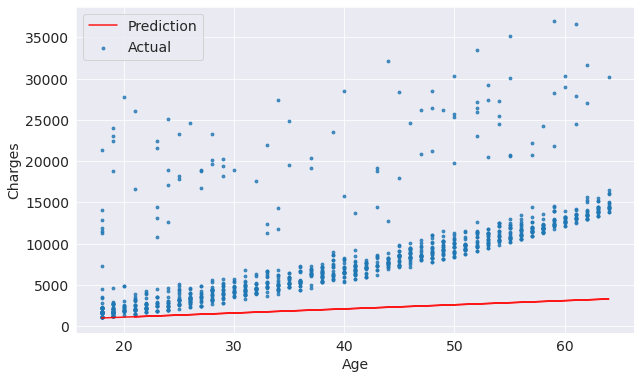

In [33]:
try_parameters(50,100)

##Using SciKit-Learn for Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
# creating model object
model = LinearRegression()

In [36]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [37]:
# fitting the model to the data
model.fit(inputs, targets)

LinearRegression()

In [38]:
#  computing the predictions for the entire set of inputs
predictions = model.predict(inputs)

In [39]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [40]:
rmse(targets, predictions)

4662.505766636391

Seems like our prediction is off by around $4000 on average, which is not too bad considering the fact that there are several outliers.

In [41]:
# The parameters of the model are stored in the coef_ and intercept_ properties.
model.coef_    #w

array([267.24891283])

In [42]:
model.intercept_     #b

-2091.4205565650864

RMSE Loss:  4662.505766636391


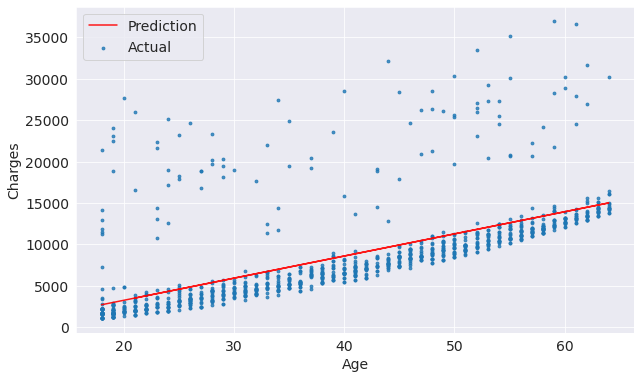

In [43]:
#  visualizing the line created by the above parameters.
try_parameters(model.coef_, model.intercept_)

The line is quite close to the points. It is slightly above the cluster of points, because it's also trying to account for the outliers.

## Linear Regression using Multiple Features
Adding another feature like "bmi" to predict charges. We simply assume the following relationship:

$charges = w_1 \times age + w_2 \times bmi + b$

We need to change just one line of code to include the BMI.

In [44]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.312835461298


In [45]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833268

In [46]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [47]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [48]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

Adding the final numeric column: "children", which seems to have some correlation with "charges".

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + b$

In [49]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542194

In [50]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [51]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038245


In [59]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125969


## Using Categorical Features for Machine Learning
If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals



## Binary Categories

The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".

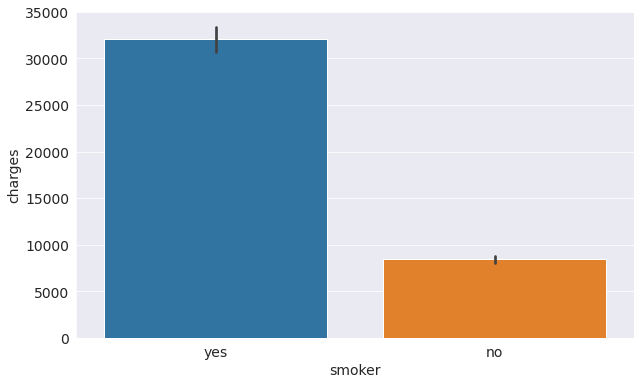

In [60]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [61]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [62]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [63]:
medical_df

age     sex     bmi  ...  southeast southwest smoker_code
0      19  female  27.900  ...        0.0       1.0           1
1      18    male  33.770  ...        1.0       0.0           0
2      28    male  33.000  ...        1.0       0.0           0
3      33    male  22.705  ...        0.0       0.0           0
4      32    male  28.880  ...        0.0       0.0           0
...   ...     ...     ...  ...        ...       ...         ...
1333   50    male  30.970  ...        0.0       0.0           0
1334   18  female  31.920  ...        0.0       0.0           0
1335   18  female  36.850  ...        1.0       0.0           0
1336   21  female  25.800  ...        0.0       1.0           0
1337   61  female  29.070  ...        0.0       0.0           1

[1338 rows x 12 columns]

We can now use the `smoker_df` column for linear regression.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + b$

In [64]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188077


The loss reduces from `11355` to `6056`, almost by 50%! This is an important lesson: never ignore categorical data.


Adding the "sex" column as well.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + b$

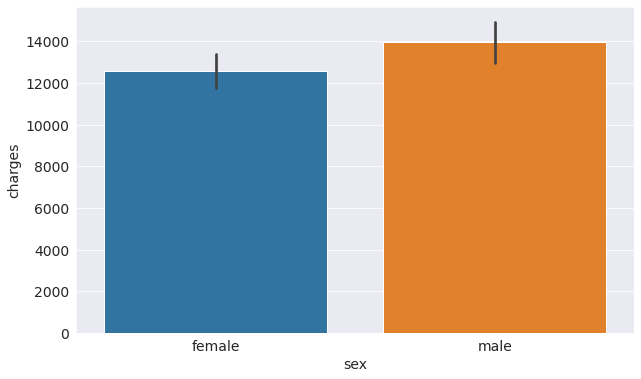

In [65]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [66]:
sex_codes = {'female': 0, 'male': 1}

In [67]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [68]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [69]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754539



### One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)

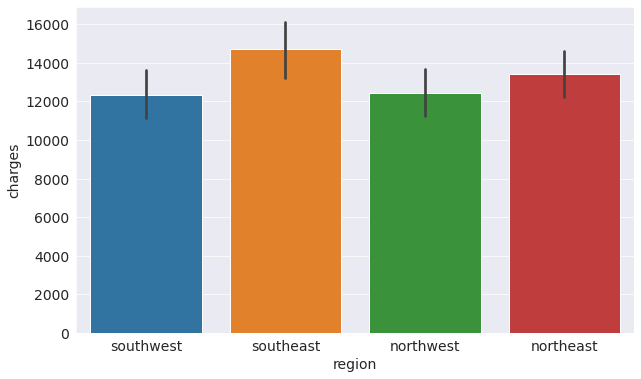

In [70]:
sns.barplot(data=medical_df, x='region', y='charges');

In [71]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_


[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [72]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [73]:
# In medical_df we are creating 4 new columns by giving the data one hot. Now it will become the part of the dataframe.
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
# Viewing the dataframe after OneHotEncoding.
medical_df

age     sex     bmi  ...  southwest smoker_code sex_code
0      19  female  27.900  ...        1.0           1        0
1      18    male  33.770  ...        0.0           0        1
2      28    male  33.000  ...        0.0           0        1
3      33    male  22.705  ...        0.0           0        1
4      32    male  28.880  ...        0.0           0        1
...   ...     ...     ...  ...        ...         ...      ...
1333   50    male  30.970  ...        0.0           0        1
1334   18  female  31.920  ...        0.0           0        0
1335   18  female  36.850  ...        0.0           0        0
1336   21  female  25.800  ...        1.0           0        0
1337   61  female  29.070  ...        0.0           1        0

[1338 rows x 13 columns]

Now including the region columns into our linear regression model.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [74]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174453


## Model Improvements
applying some more improvements to our model.

### Feature Scaling

Due to regulatory requirements, we also need to explain the rationale behind the predictions our model. 

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

To compare the importance of each feature in the model, our first instinct might be to compare their weights. 

In [75]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [76]:
model.intercept_

-12525.547811195444

In [77]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

feature        weight
0          age    256.856353
1          bmi    339.193454
2     children    475.500545
3  smoker_code  23848.534542
4     sex_code   -131.314359
5    northeast    587.009235
6    northwest    234.045336
7    southeast   -448.012814
8    southwest   -373.041756
9            1 -12525.547811

Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![](https://i.imgur.com/dT5fLFI.png)

We can apply scaling using the StandardScaler class from `scikit-learn`.

In [78]:
medical_df

age     sex     bmi  ...  southwest smoker_code sex_code
0      19  female  27.900  ...        1.0           1        0
1      18    male  33.770  ...        0.0           0        1
2      28    male  33.000  ...        0.0           0        1
3      33    male  22.705  ...        0.0           0        1
4      32    male  28.880  ...        0.0           0        1
...   ...     ...     ...  ...        ...         ...      ...
1333   50    male  30.970  ...        0.0           0        1
1334   18  female  31.920  ...        0.0           0        0
1335   18  female  36.850  ...        0.0           0        0
1336   21  female  25.800  ...        1.0           0        0
1337   61  female  29.070  ...        0.0           1        0

[1338 rows x 13 columns]

In [79]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [80]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [81]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [82]:
# We can now scale data as follows:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [85]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [86]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174453


We can now compare the weights in the formula:

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [87]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

feature        weight
3  smoker_code  23848.534542
9            1   8466.483215
0          age   3607.472736
1          bmi   2067.691966
5    northeast    587.009235
2     children    572.998210
6    northwest    234.045336
4     sex_code   -131.314359
8    southwest   -373.041756
7    southeast   -448.012814

### Creating a Test Set

It's common practice to set aside a small fraction of the data (e.g. 10%) just for testing and reporting the results of the model.

In [88]:
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [91]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 6691.975512279495


In [92]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 5968.691353403138


 training loss(5968.691353403138) is lower than the test loss(6691.975512279495)